In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [42]:
fs = 1000
fc = 10 # 1/T
fc2 = 30

psi = np.pi / 6

time = np.arange(0, 10/fc, 1/fs, dtype=np.float64)
sin_wave = np.sin(2*np.pi*fc*time)
cos_wave = np.cos(2*np.pi*fc*time)
sum_wave = cos_wave * np.cos(psi) - sin_wave * np.sin(psi)

exp_wave = np.exp(1j*2*np.pi*fc2*time)
sum_exp_wave = np.real(exp_wave * np.exp(1j*psi))

f_vector = np.zeros(exp_wave.shape[0], dtype=np.complex128)
f_vector[:exp_wave.shape[0]//2] = (1 + 0j)
f_vector[exp_wave.shape[0]//2:] = (1+1j ) / np.sqrt(2)
wave_from_f2 = np.real(exp_wave * f_vector)
wave_from_f  = cos_wave * np.real(f_vector) - sin_wave * np.imag(f_vector)

demod_wave_f2 = np.conj(exp_wave) * wave_from_f2

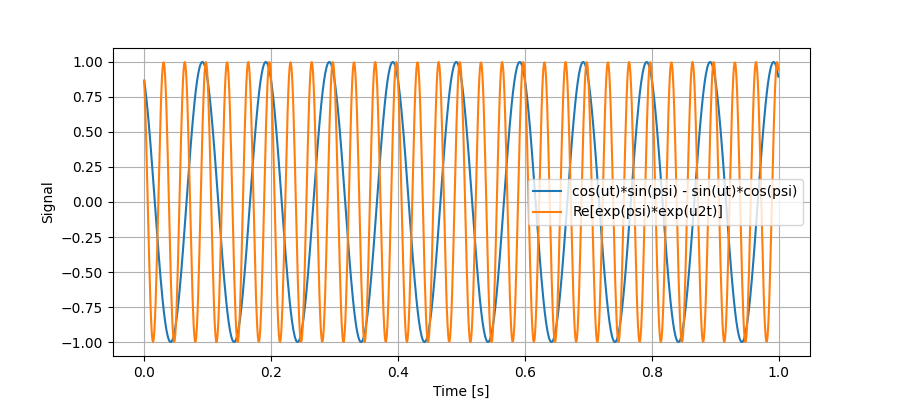

In [43]:
plt.figure(figsize=(9,4))
# plt.plot(time, sin_wave, '--',label="sin")
# plt.plot(time, cos_wave, '--',label="cos")
plt.plot(time, sum_wave, label="cos(ut)*sin(psi) - sin(ut)*cos(psi)")
plt.plot(time, sum_exp_wave, label="Re[exp(psi)*exp(u2t)]")
plt.xlabel("Time [s]")
plt.ylabel("Signal")
plt.legend()
plt.grid()
plt.show()

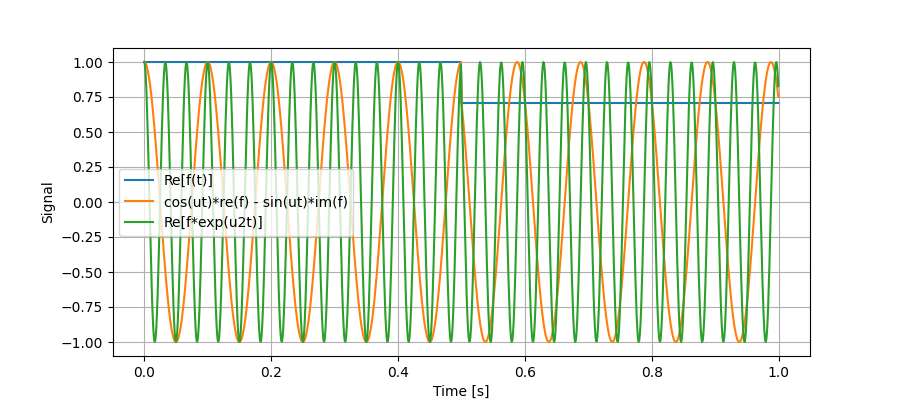

In [44]:
plt.figure(figsize=(9,4))
plt.plot(time, np.real(f_vector), label="Re[f(t)]")
# plt.plot(time, np.imag(f_vector), label="Im[f(t)]")
plt.plot(time, wave_from_f, label="cos(ut)*re(f) - sin(ut)*im(f)")
plt.plot(time, wave_from_f2, label="Re[f*exp(u2t)]")
plt.xlabel("Time [s]")
plt.ylabel("Signal")
plt.legend()
plt.grid()
plt.show()

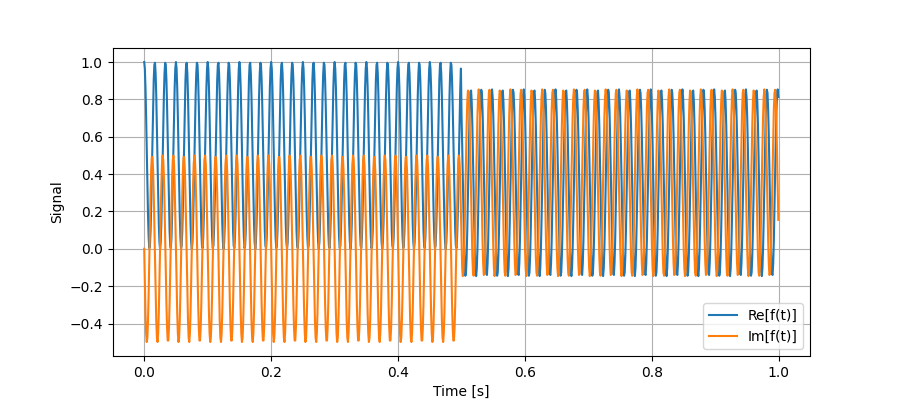

In [45]:
plt.figure(figsize=(9,4))
plt.plot(time, np.real(demod_wave_f2), label="Re[f(t)]")
plt.plot(time, np.imag(demod_wave_f2), label="Im[f(t)]")
plt.xlabel("Time [s]")
plt.ylabel("Signal")
plt.legend()
plt.grid()
plt.show()

C:\Users\isvoropaev\AppData\Local\Temp\ipykernel_18628\1149974415.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


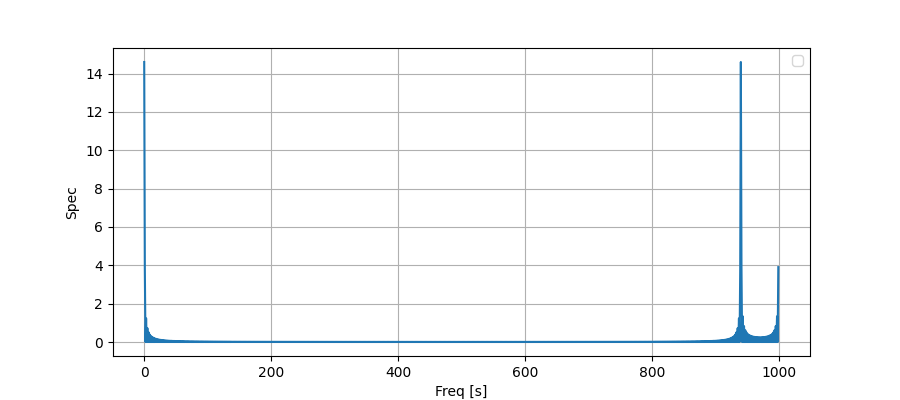

In [54]:
demod_spec = np.fft.fft(demod_wave_f2, norm='ortho')

plt.figure(figsize=(9,4))
plt.plot(np.arange(0, len(demod_wave_f2), 1), np.abs(demod_spec))
plt.xlabel("Freq [s]")
plt.ylabel("Spec")
plt.legend()
plt.grid()
plt.show()

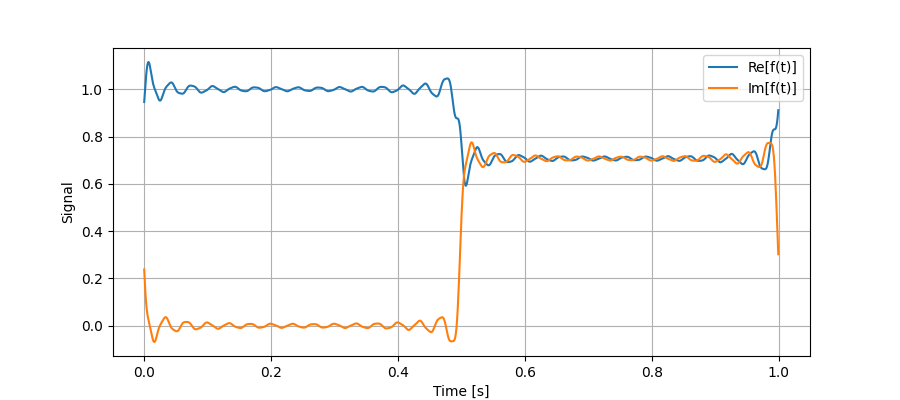

In [56]:
demod_spec_filt = np.zeros(demod_wave_f2.shape, dtype=np.complex128)
demod_spec_filt[:80] = demod_spec[:80]*2
demod_spec_filt[970:] = demod_spec[970:]*2

demod_sig_filt = np.fft.ifft(demod_spec_filt, norm='ortho')

plt.figure(figsize=(9,4))
plt.plot(time, np.real(demod_sig_filt), label="Re[f(t)]")
plt.plot(time, np.imag(demod_sig_filt), label="Im[f(t)]")
plt.xlabel("Time [s]")
plt.ylabel("Signal")
plt.legend()
plt.grid()
plt.show()